In [41]:
import pandas as pd

In [42]:
import matplotlib.pyplot as plt

In [43]:
import seaborn as sns

In [44]:
data=pd.read_csv('tested.csv')

In [45]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
data.shape

(418, 12)

In [48]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
data['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [50]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [51]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### Performing one hot encoding

In [53]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [54]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [55]:
pcl=pd.get_dummies(data['Pclass'],drop_first=True)

In [56]:
data1=pd.concat([data,embark,sex,pcl],axis=1)

In [57]:
data1.drop(['PassengerId','Name','Ticket','Fare','Cabin','Sex','Embarked','Pclass'],axis=1,inplace=True)

In [58]:
data1.isnull().sum()

Survived     0
Age         86
SibSp        0
Parch        0
Q            0
S            0
male         0
2            0
3            0
dtype: int64

In [59]:
data1.describe()

,Survived,Age,SibSp,Parch,Q,S,male,2,3
count,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,30.272590,0.447368,0.392344,0.110048,0.645933,0.636364,0.222488,0.521531
std,0.481622,14.181209,0.896760,0.981429,0.313324,0.478803,0.481622,0.416416,0.500135
min,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,76.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Filling null values and replacing  with mean

In [60]:
data1.fillna(data1.mean(), inplace=True)

In [61]:
data1.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Q           0
S           0
male        0
2           0
3           0
dtype: int64

In [62]:
data1.describe()

,Survived,Age,SibSp,Parch,Q,S,male,2,3
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,30.272590,0.447368,0.392344,0.110048,0.645933,0.636364,0.222488,0.521531
std,0.481622,12.634534,0.896760,0.981429,0.313324,0.478803,0.481622,0.416416,0.500135
min,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.272590,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,35.750000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,76.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data visulalisation

<Axes: >

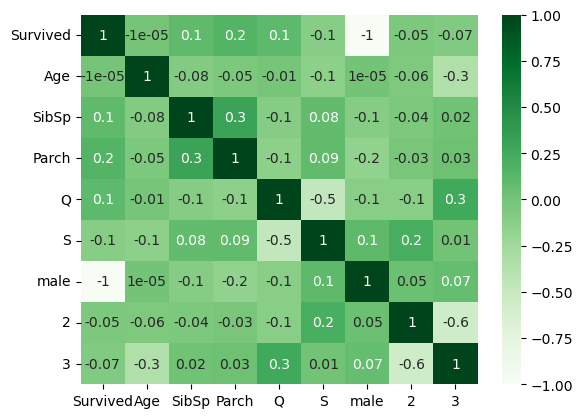

In [63]:
sns.heatmap(data1.corr(),annot=True,fmt='.1g',cmap='Greens')

<Axes: xlabel='Survived', ylabel='count'>

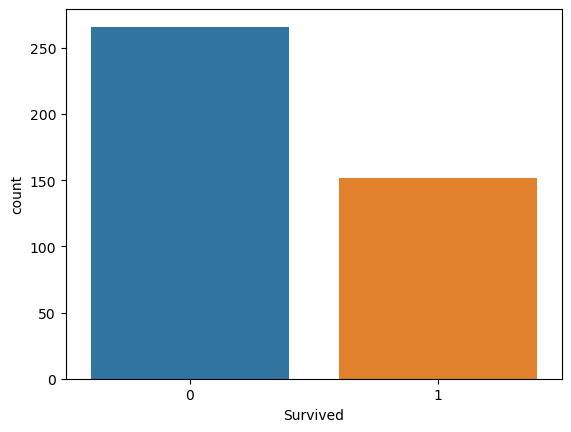

In [64]:
sns.countplot(data1,x='Survived')

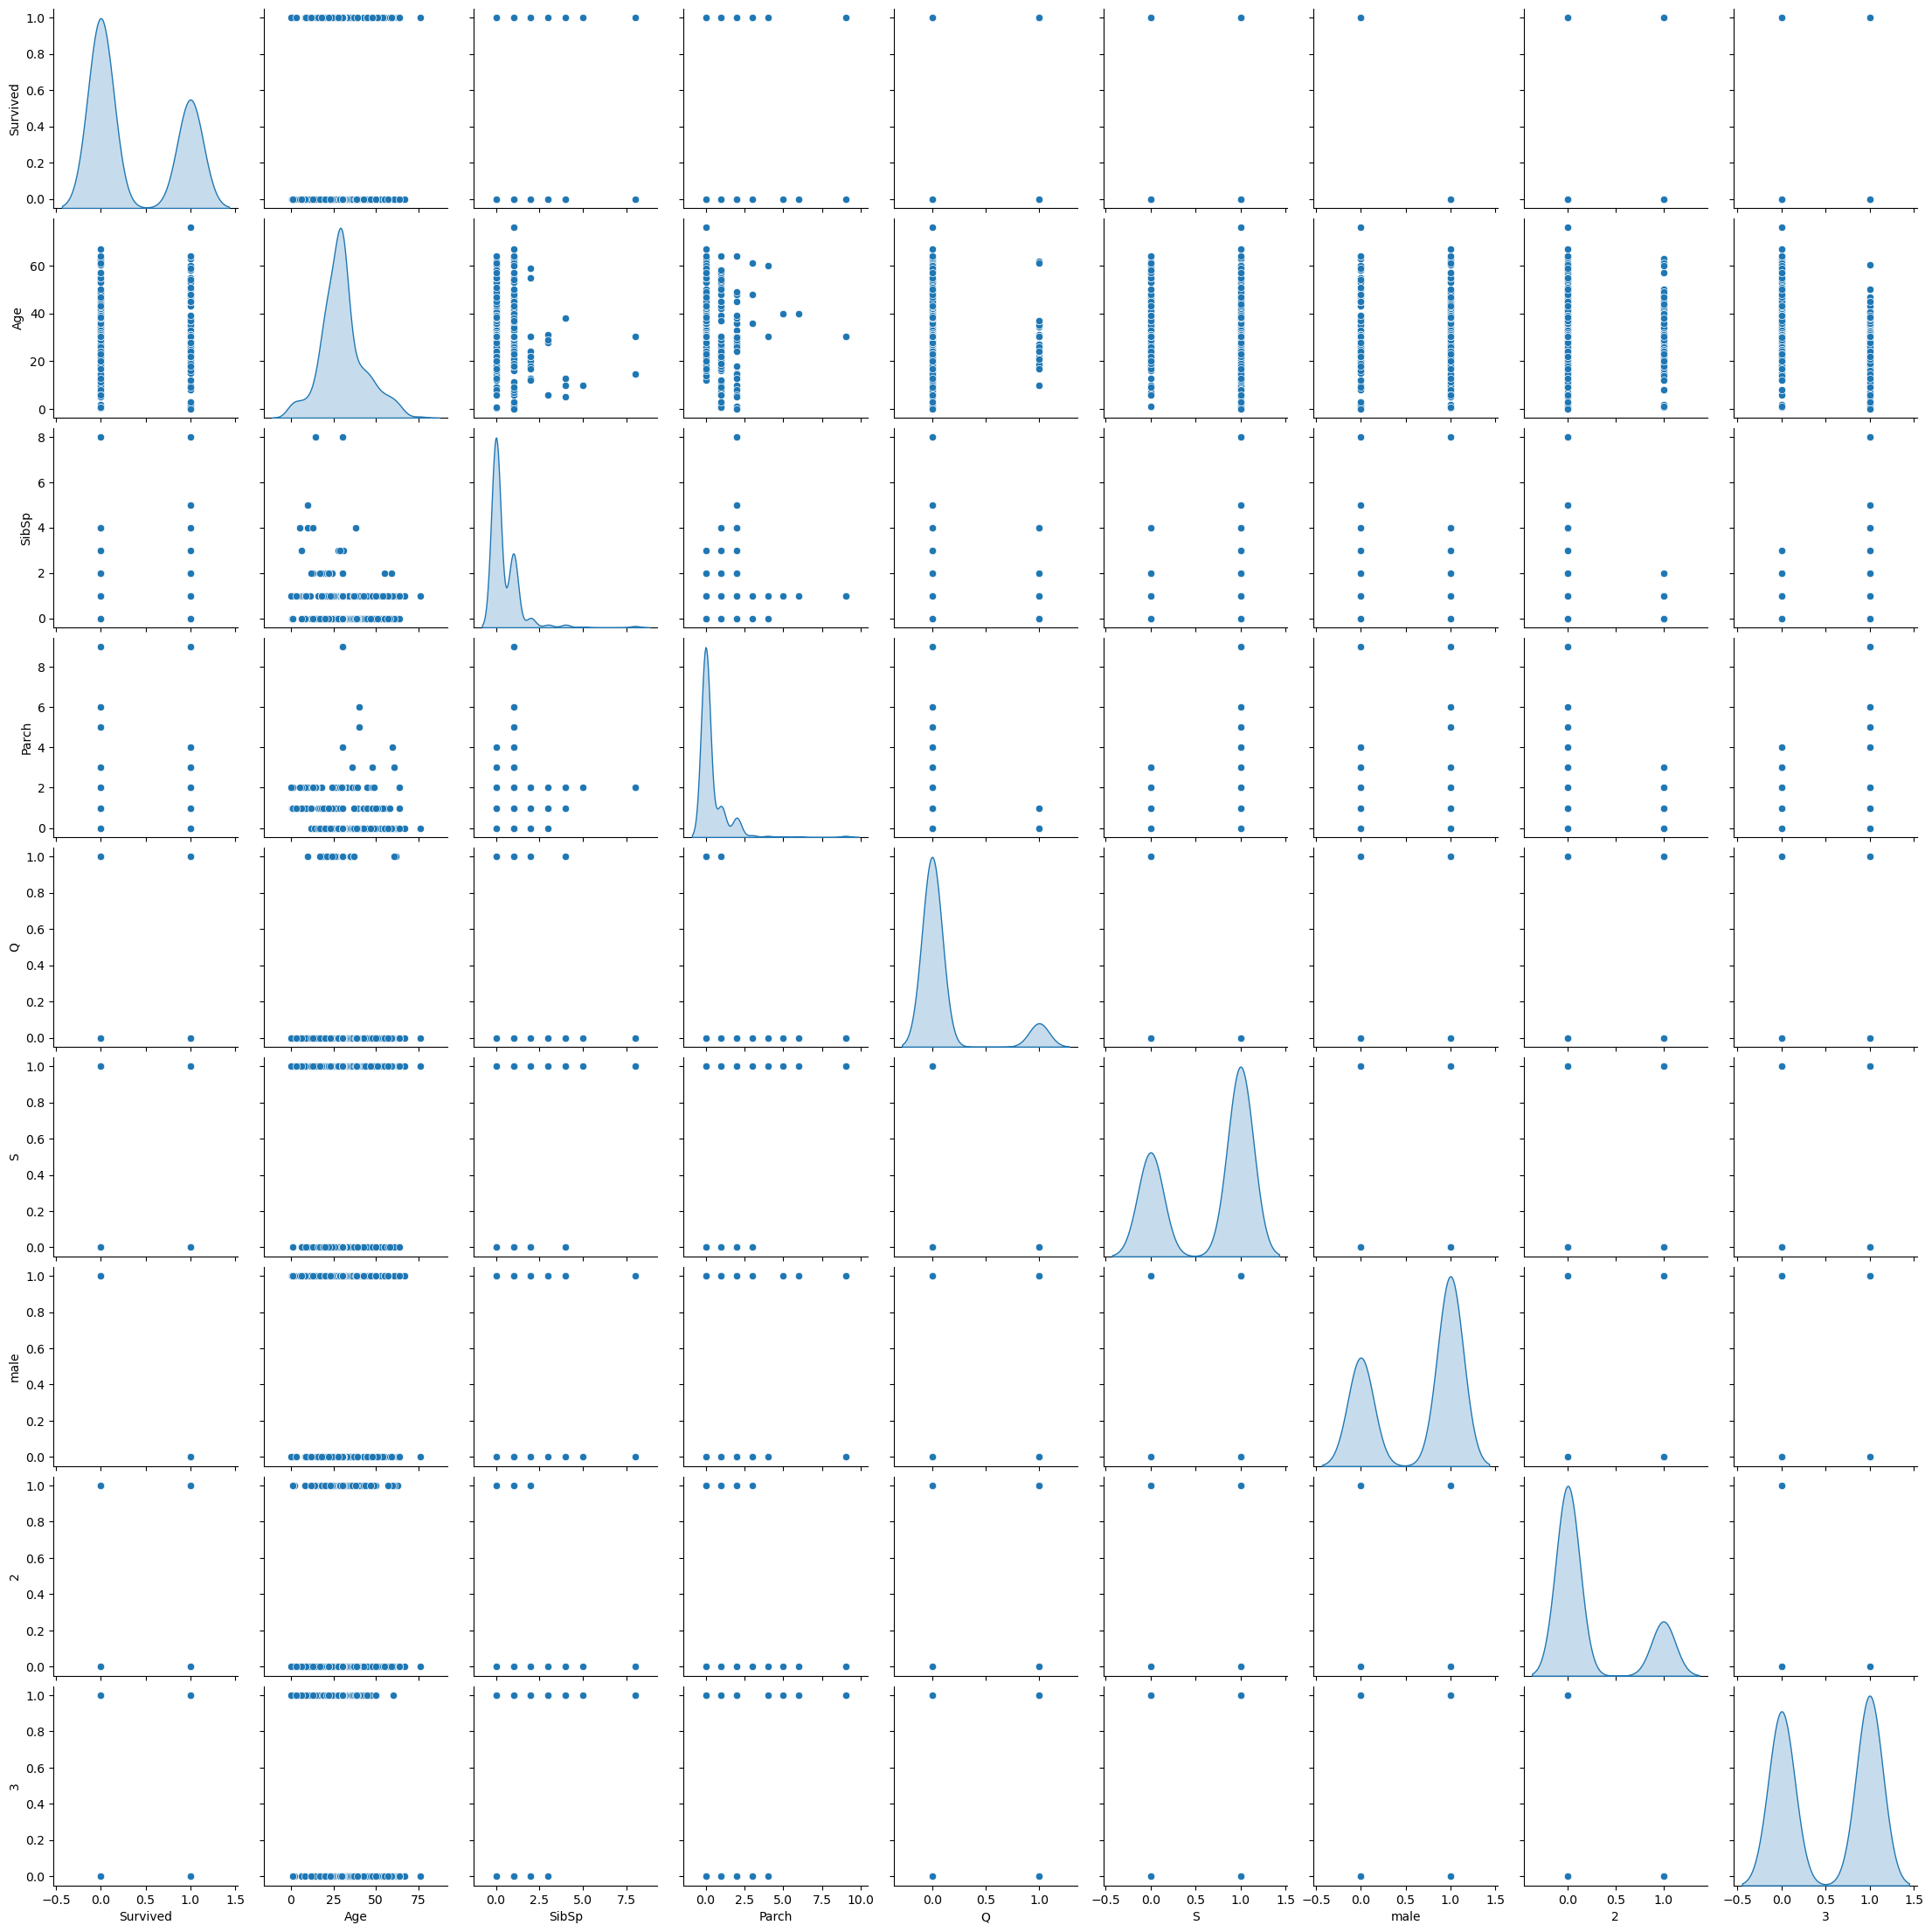

In [65]:
sns.pairplot(data1,diag_kind='kde')

In [66]:
data1.head()

,Survived,Age,SibSp,Parch,Q,S,male,2,3
0,0,34.5,0,0,1,0,1,0,1
1,1,47.0,1,0,0,1,0,0,1
2,0,62.0,0,0,1,0,1,1,0
3,0,27.0,0,0,0,1,1,0,1
4,1,22.0,1,1,0,1,0,0,1


In [67]:
data1.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Q', 'S', 'male', 2, 3], dtype='object')

## Splitting the data

In [68]:
from sklearn.model_selection import train_test_split #sklearn package's randomized data splitting function
from sklearn.linear_model import LogisticRegression

In [69]:
X=data1.drop('Survived',axis=1)
y=data1['Survived']

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=3)

### Modles implementation

### <font color='red'>Logistic Regression</font>

In [71]:
model=LogisticRegression(random_state=3)
model.fit(X_train.values,y_train)

LogisticRegression(random_state=3)

In [72]:
predictions=model.predict(X_test.values)
print('Train set score :',model.score(X_train.values,y_train))
print('Test Set Score :',model.score(X_test.values,y_test))
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score',accuracy_score(predictions,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_test,predictions))
print("Classification_Report: \n",classification_report(y_test,predictions))

Train set score : 1.0
Test Set Score : 1.0
Accuracy Score 1.0
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### <font color='red'>Naive Bayes GaussianNB Classifier</font>

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Gnb = GaussianNB()
Gnb.fit(X_train.values,y_train)

GaussianNB()

In [74]:
y_pred_Gnb = Gnb.predict(X_test.values)
predictions=Gnb.predict(X_test.values)
print('Train set score :',Gnb.score(X_train.values,y_train))
print('Test Set Score :',Gnb.score(X_test.values,y_test))
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score',accuracy_score(predictions,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_test,predictions))
print("Classification_Report: \n",classification_report(y_test,predictions))

Train set score : 1.0
Test Set Score : 1.0
Accuracy Score 1.0
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### <font color='red'>Naive Bayes BernoulliNB Classifier</font>

In [75]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Bnb = BernoulliNB()
Bnb.fit(X_train.values,y_train)

BernoulliNB()

In [76]:
y_pred_Bnb = Bnb.predict(X_test.values)
predictions=Bnb.predict(X_test.values)
print('Train set score :',Bnb.score(X_train.values,y_train))
print('Test Set Score :',Bnb.score(X_test.values,y_test))
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score',accuracy_score(predictions,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_test,predictions))
print("Classification_Report: \n",classification_report(y_test,predictions))

Train set score : 1.0
Test Set Score : 1.0
Accuracy Score 1.0
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### <font color='red'>Support Vector Classifier (kernel='linear')</font>

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel='linear',gamma='auto',probability=True)
svc_linear.fit(X_train.values,y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [78]:
y_pred_svc_linear = svc_linear.predict(X_test.values)
predictions=svc_linear.predict(X_test.values)
print('Train set score :',svc_linear.score(X_train.values,y_train))
print('Test Set Score :',svc_linear.score(X_test.values,y_test))
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score',accuracy_score(predictions,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_test,predictions))
print("Classification_Report: \n",classification_report(y_test,predictions))

Train set score : 1.0
Test Set Score : 1.0
Accuracy Score 1.0
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### <font color='red'>Support Vector Classifier (kernel='rbf')</font>

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_rbf = SVC(kernel = "rbf", gamma=2, C=1)
svc_rbf.fit(X_train.values,y_train)

SVC(C=1, gamma=2)

In [80]:
y_pred_svc_rbf = svc_rbf.predict(X_test.values)
predictions=svc_rbf.predict(X_test.values)
print('Train set score :',svc_rbf.score(X_train.values,y_train))
print('Test Set Score :',svc_rbf.score(X_test.values,y_test))
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score',accuracy_score(predictions,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_test,predictions))
print("Classification_Report: \n",classification_report(y_test,predictions))

Train set score : 1.0
Test Set Score : 0.7698412698412699
Accuracy Score 0.7698412698412699
Confusion Matrix: 
 [[78  0]
 [29 19]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        78
           1       1.00      0.40      0.57        48

    accuracy                           0.77       126
   macro avg       0.86      0.70      0.71       126
weighted avg       0.83      0.77      0.74       126

